In [ ]:
! unzip eye-disease-dataset.zip

Archive:  eye-disease-dataset.zip
  inflating: Eye_diseases/Bulging_Eyes/image-10.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-11.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-12.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-13.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-14.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-15.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-2.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-3.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-4.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-5.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-6.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-7.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-8.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image-9.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/image.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/images-10.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/images-11.jpeg  
  inflating: Eye_diseases/Bulging_Eyes/i

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from numpy import argmax

In [ ]:
PATH = "./Eye_diseases"
data_dir_list = os.listdir(PATH)
data_dir_list

['Glaucoma', 'Uveitis', 'Bulging_Eyes', 'Cataracts', 'Crossed_Eyes']

In [ ]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 5
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(PATH +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Glaucoma folder
Getting image from Uveitis folder
Getting image from Bulging_Eyes folder
Getting image from Cataracts folder
Getting image from Crossed_Eyes folder


In [ ]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

num_classes 5
Shape of image data (383, 224, 224, 3)


In [ ]:
num_of_samples

383

In [ ]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4])

In [ ]:
target_column

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [ ]:
first_Mod = Sequential()

first_Mod.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
first_Mod.add(Conv2D(64,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.2))

first_Mod.add(Conv2D(128,(3,3),activation='relu'))
first_Mod.add(Conv2D(128,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.2))

first_Mod.add(Flatten())
first_Mod.add(Dense(128,activation='relu'))
first_Mod.add(Dropout(0.2))
first_Mod.add(Dense(num_classes,activation='softmax'))
first_Mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

first_Mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                        

In [ ]:
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)

Epoch 1/5
9/9 [==============================] - 26s 788ms/step - loss: 7.3150 - accuracy: 0.3246 - val_loss: 1.4247 - val_accuracy: 0.4375
Epoch 2/5
9/9 [==============================] - 3s 294ms/step - loss: 1.3965 - accuracy: 0.4366 - val_loss: 1.4249 - val_accuracy: 0.4375
Epoch 3/5
9/9 [==============================] - 3s 318ms/step - loss: 1.3695 - accuracy: 0.4552 - val_loss: 1.4867 - val_accuracy: 0.3500
Epoch 4/5
9/9 [==============================] - 3s 313ms/step - loss: 1.3450 - accuracy: 0.4104 - val_loss: 1.4422 - val_accuracy: 0.4250
Epoch 5/5
3/3 [==============================] - 0s 69ms/step - loss: 1.4346 - accuracy: 0.4375


In [ ]:
print("Loss of the model is - " , first_Mod.evaluate(X_temp,y_temp)[0])
print("Accuracy of the model is - " , first_Mod.evaluate(X_temp,y_temp)[1]*100 , "%")

4/4 [==============================] - 2s 544ms/step - loss: 1.4087 - accuracy: 0.4609
Loss of the model is -  1.4086856842041016
4/4 [==============================] - 0s 52ms/step - loss: 1.4087 - accuracy: 0.4609
Accuracy of the model is -  46.086955070495605 %


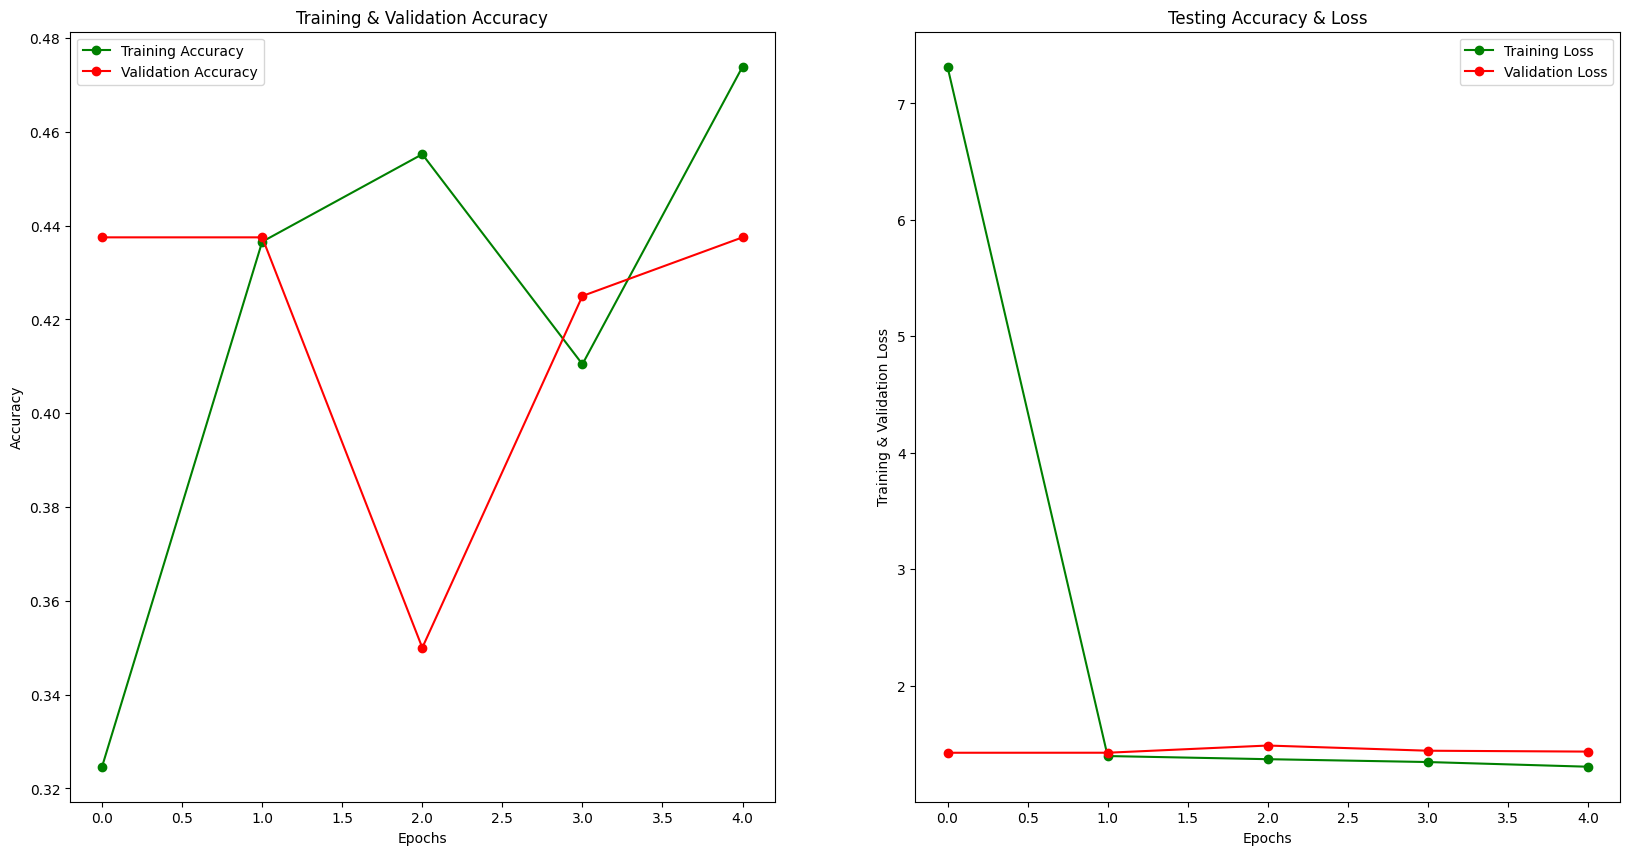

In [ ]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = first_Mod.predict(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

3/3 [==============================] - 0s 84ms/step


array([0.13322002, 0.10834794, 0.33567256, 0.29033712, 0.13242237,
       0.13491923, 0.21680403, 0.35275745, 0.16072638, 0.13479291,
       0.15075591, 0.22213331, 0.32446796, 0.15048996, 0.15215288],
      dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
first_Mod.save('eyedisease.h5')

In [ ]:
import numpy as np
from PIL import Image

# Assuming you have a single test image stored as a file
test_image_path = '/content/test.jpg'  # Replace with the path to your test image

# Load and preprocess the test image
test_image = Image.open(test_image_path)
test_image = test_image.resize((224, 224))  # Resize if needed
test_image = np.array(test_image)
test_image = test_image.astype('float32') / 255.0  # Normalize the image
test_image = np.expand_dims(test_image, axis=0)

# Perform prediction on the test image
predictions = first_Mod.predict(test_image)
predicted_class_index = np.argmax(predictions)
class_labels = ['Glaucoma', 'Uveitis', 'Bulging_Eyes','Cataracts','Crossed_Eyes']  # Replace with your class labels
predicted_label = class_labels[predicted_class_index]
print('Predicted Disease:', predicted_label)

1/1 [==============================] - 0s 21ms/step
Predicted Disease: Bulging_Eyes


In [ ]:

# Define the class priority weights or probabilities
class_priority = [0.9, 0.7, 0.4,0.6,0.2]  # Replace with the priorities of each class

# Apply the class priority to the predictions
weighted_predictions = predictions * class_priority

# Get the predicted class index based on the weighted predictions
predicted_class_index = np.argmax(weighted_predictions)

# Get the predicted class label
class_labels = ['Glaucoma', 'Uveitis', 'Bulging_Eyes','Cataracts','Crossed_Eyes']  # Replace with your class labels
predicted_label = class_labels[predicted_class_index]

print('Predicted Disease:', predicted_label)

Predicted Disease: Bulging_Eyes


In [ ]:
#yesss